# Example: Harris-Förstner Corner Detection

In this section, it is demonstrated how [scikit-image](https://scikit-image.org) can be applied to detect corners. Particularly, the Harris-Förstner approach, which has been introduced in the [previous section](localFeatures.md) will be applied.  

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, io
from skimage.feature import corner_harris,corner_peaks
from warnings import filterwarnings

In [14]:
filterwarnings("ignore")

In [15]:
im1="../pics/empire.jpg"
im2="../pics/blobs.png"
im3="../pics/gantrycrane.png"
im4="../pics/a4weiss.jpg"
image = img_as_float(io.imread(im4,as_gray=True))

As already stated in the [previous section](localFeatures.md) in 
[scikit-image](https://scikit-image.org), 

* one function - [corner_harris()](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.corner_harris) - calculates for all pixels the value, given in the left hand side of the unequation, 
* and a second function - [corner_peaks()](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.corner_peaks) - applies the **threshold $T$** (default value 0) and a **minimum distance $D_{min}$** to the result of the first function. 

Detected corners are then separated by at least $D_{min}$ pixels. The influence of varying parameters $\kappa$ and $D_{min}$ is demonstrated in the picture below)

In [16]:
M=10 # minimum distance
K=0.02 # Kappa
filtered_coords = corner_peaks(corner_harris(image,k=K),
                               min_distance=M,threshold_abs=0)
#Note that the threshold T (default: T=0) is applied in corner_peaks; 
#corner_harris returns det(A)-k*trace(A)**2 for all pixels

(107,)


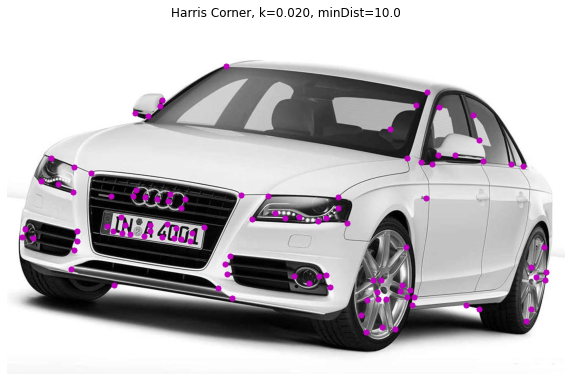

In [18]:
plt.figure(figsize=(10,20))
plt.imshow(image,cmap = plt.cm.gray)
y, x = np.transpose(filtered_coords)
print(x.shape)
plt.plot(x, y, 'm.',ms=10)
plt.axis('off')
plt.title("Harris Corner, k=%1.3f, minDist=%2.1f"%(K,M))
plt.show()

Next, the value for $\kappa$ is increased, i.e. less corners are detected:

In [21]:
M=40
K=0.08
filtered_coords = corner_peaks(corner_harris(image,k=K),min_distance=M)

(31,)


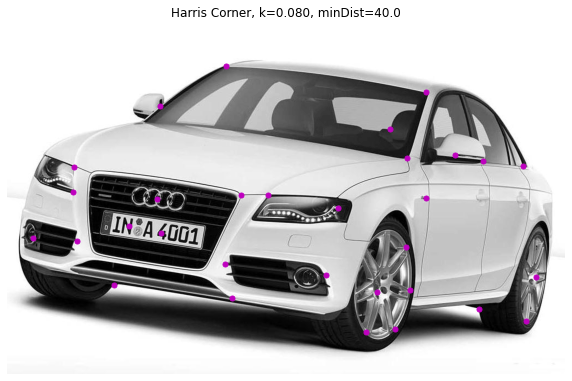

In [22]:
plt.figure(figsize=(10,20))
plt.imshow(image,cmap = plt.cm.gray)
y, x = np.transpose(filtered_coords)
print (x.shape)
plt.plot(x, y, 'm.',ms=10)
plt.axis('off')
plt.title("Harris Corner, k=%1.3f, minDist=%2.1f"%(K,M))
plt.show()